In [50]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [54]:
candidate_items = pd.read_csv('../Data/dressipi_recsys2022/candidate_items.csv')
item_features = pd.read_csv('../Data/dressipi_recsys2022/item_features.csv')


train_purchases = pd.read_csv('../Data/dressipi_recsys2022/train_purchases.csv')
train_sessions = pd.read_csv('../Data/dressipi_recsys2022/train_sessions.csv')

# Sesiones

In [55]:
train_sessions

,session_id,item_id,date
0,3,9655,2020-12-18 21:25:00.373
1,3,9655,2020-12-18 21:19:48.093
2,13,15654,2020-03-13 19:35:27.136
3,18,18316,2020-08-26 19:18:30.833
4,18,2507,2020-08-26 19:16:31.211
...,...,...,...
4743815,4440001,20409,2020-10-30 23:37:20.658
4743816,4440001,14155,2020-10-30 23:31:56.607
4743817,4440001,14303,2020-10-30 23:36:17.934
4743818,4440001,27852,2020-10-30 23:39:55.186


In [56]:
print('Cantidad de sesiones unicas:')
print(len(train_sessions.session_id.unique()))

Cantidad de sesiones unicas:
1000000


In [71]:
print('Cantidad de items unicos:')
print(len(train_sessions.item_id.unique()))

Cantidad de items unicos:
23496


## Cantidad de vistas por sesion

In [57]:
cantidad_de_vistas_sesion = train_sessions\
    .groupby(['session_id'], as_index=False)['item_id'].count()\
    .sort_values(by='session_id', ascending=True)\
    .rename(columns={'item_id': 'vistas_sesion'})\
    .reset_index(drop=True)

In [58]:
cantidad_de_vistas_sesion

,session_id,vistas_sesion
0,3,2
1,13,1
2,18,3
3,19,17
4,24,9
...,...,...
999995,4439986,6
999996,4439990,11
999997,4439994,1
999998,4439999,7


In [59]:
cantidad_de_vistas_sesion.vistas_sesion.describe()

count    1000000.000000
mean           4.743820
std            6.084665
min            1.000000
25%            1.000000
50%            3.000000
75%            6.000000
max          100.000000
Name: vistas_sesion, dtype: float64

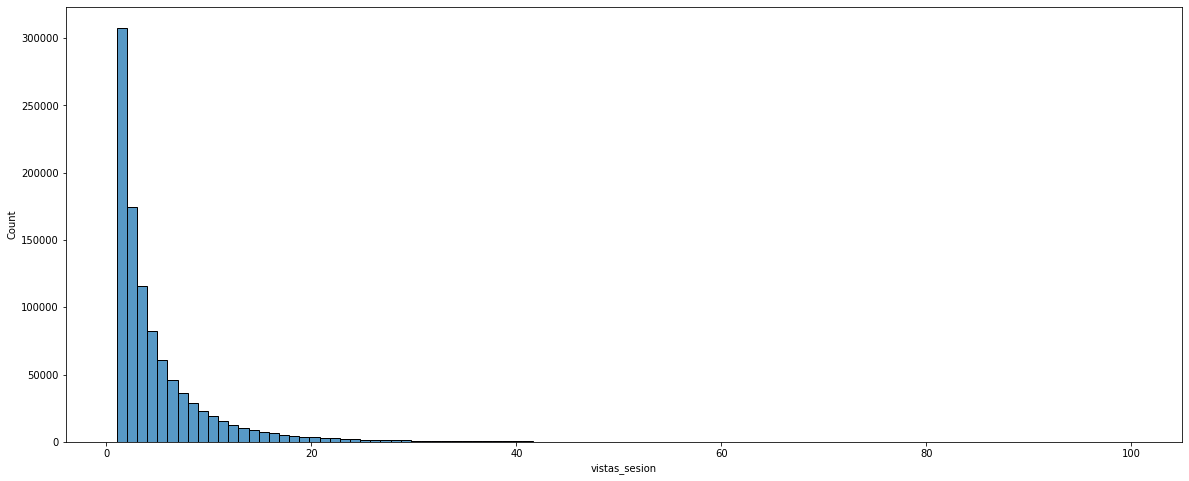

In [62]:
plt.figure(figsize=(20,8))
Plot = sns.histplot(cantidad_de_vistas_sesion["vistas_sesion"], bins = 100)

# Compras

In [63]:
train_purchases

,session_id,item_id,date
0,3,15085,2020-12-18 21:26:47.986
1,13,18626,2020-03-13 19:36:15.507
2,18,24911,2020-08-26 19:20:32.049
3,19,12534,2020-11-02 17:16:45.92
4,24,13226,2020-02-26 18:27:44.114
...,...,...,...
999995,4439986,2915,2021-05-13 11:56:37.464
999996,4439990,8786,2020-08-22 14:28:22.382
999997,4439994,21630,2020-11-27 20:10:28.961
999998,4439999,16962,2020-11-27 11:01:41.356


In [64]:
print('Cantidad de sesiones unicas:')
print(len(train_purchases.session_id.unique()))

Cantidad de sesiones unicas:
1000000


In [70]:
print('Cantidad de items unicos:')
print(len(train_purchases.item_id.unique()))

Cantidad de items unicos:
18907


# Caracteristicas de los items

In [65]:
item_features

,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,351
3,2,33,802
4,2,72,75
...,...,...,...
471746,28143,68,351
471747,28143,55,390
471748,28143,11,109
471749,28143,73,91


In [68]:
print('Cantidad de items unicos:')
print(len(item_features.item_id.unique()))

Cantidad de items unicos:
23691


In [74]:
print('Cantidad de codigos de categoria de caracteristicas unicos:')
print(len(item_features.feature_category_id.unique()))

Cantidad de codigos de categoria de caracteristicas unicos:
73


In [75]:
print('Cantidad de codigos de valor de la categoria de caracteristicas unicos:')
print(len(item_features.feature_value_id.unique()))

Cantidad de codigos de valor de la categoria de caracteristicas unicos:
890


In [76]:
cantidad_de_caracteristicas_por_item = item_features\
    .groupby(['item_id'], as_index=False)['feature_category_id'].count()\
    .sort_values(by='item_id', ascending=True)\
    .rename(columns={'feature_category_id': 'cantidad_de_caracteristicas'})\
    .reset_index(drop=True)

In [77]:
cantidad_de_caracteristicas_por_item

,item_id,cantidad_de_caracteristicas
0,2,13
1,3,24
2,4,24
3,7,15
4,8,24
...,...,...
23686,28139,24
23687,28140,18
23688,28141,24
23689,28142,16


In [82]:
cantidad_de_caracteristicas_por_item.cantidad_de_caracteristicas.describe()

count    23691.000000
mean        19.912667
std          5.130942
min          2.000000
25%         17.000000
50%         20.000000
75%         24.000000
max         33.000000
Name: cantidad_de_caracteristicas, dtype: float64

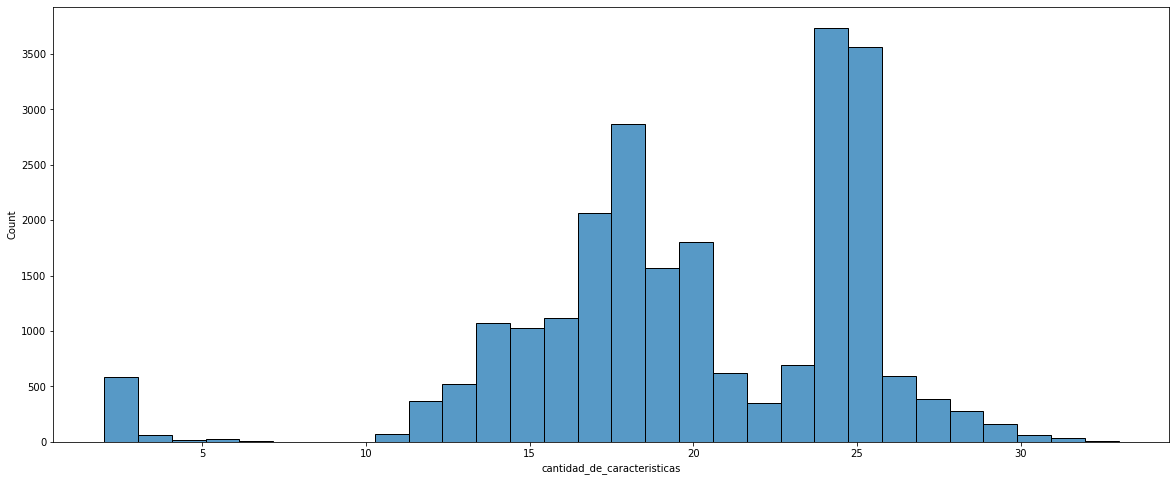

In [90]:
plt.figure(figsize=(20,8))
Plot = sns.histplot(cantidad_de_caracteristicas_por_item["cantidad_de_caracteristicas"], bins = 30)

# Items candidatos

In [72]:
candidate_items

,item_id
0,4
1,8
2,9
3,19
4,20
...,...
4985,28128
4986,28131
4987,28132
4988,28133


In [92]:
len(candidate_items.item_id.unique())

4990